In [1]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from os.path import basename, join, isfile

In [4]:
conditions = ['go', 'successful stop', 'failed stop', 'junk']

data_dir = '/scratch/PSB6351_2017/ds008_R2.0.0/'
subjects = [basename(s) for s in glob(join(data_dir, 'sub-*'))]
itis = np.array([])
for s in subjects:
    tsvs = sorted(glob(join(data_dir, s, 'func/{0}_task-stopsignal_run-*_events.tsv'.format(s))))
    for tsv in tsvs:
        run_name = re.search('(run-[0-9][0-9])', tsv).group(0)
        func_file = join(data_dir, s, 'func/{0}_task-stopsignal_{1}_bold.nii.gz'.format(s, run_name))
        if not isfile(func_file):
            print('{0} {1} functional data DNE.'.format(s, run_name))
        else:
            df = pd.read_csv(tsv, sep='\t')
            itis = np.concatenate((itis, np.diff(df['onset'].values)))
            for c in conditions:
                c_name = c.replace(' ', '_')
                red_df = df.loc[df['trial_type']==c]
                
                # Extract relevant fields from red_df, use RT as amplitude
                rt_amp = red_df[['onset', 'duration', 'response_time']].values.astype(float)
                rt_dur = red_df[['onset', 'response_time']].values.astype(float)
                rt_dur = np.concatenate((rt_dur, np.ones((rt_dur.shape[0], 1))), axis=1)
                
                # Mean center parametric modulator to 1
                rt_amp[:, -1] = rt_amp[:, -1] - (np.mean(rt_amp[:, -1]) - 1)
                rt_amp_name = '{0}_stopsignal_{1}_{2}_RTamp_evs.txt'.format(s, c_name, run_name)
                rt_dur_name = '{0}_stopsignal_{1}_{2}_RTdur_evs.txt'.format(s, c_name, run_name)

sub-11 run-03 functional data DNE.
sub-12 run-03 functional data DNE.


Mean ISI is 2.82775590551


/home/data/nbc/ns-vs-bm/ns-vs-bm/env/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


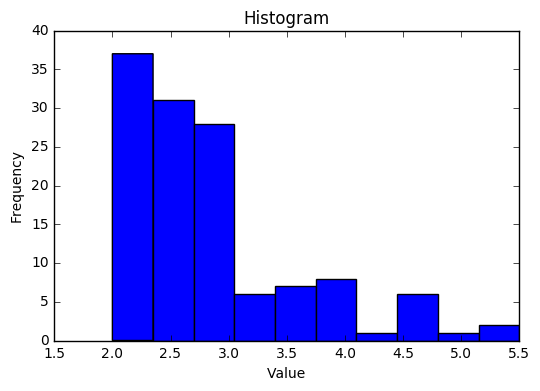

In [3]:
onsets = df['onset'].values
itis = np.diff(onsets)
fig, ax = plt.subplots()
ax.hist(itis)
ax.set_title('Histogram')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
fig.show()
print('Mean ISI is {0}'.format(np.mean(itis)))